<a href="https://colab.research.google.com/github/SuheirJammal/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predition of Product Sales

  - Author: Suheir Jammal

## Project Overview

## Load and Inspect Data

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import required packages
import pandas as pd

# Save the filepath and load the data as "df_sales"
fpath = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df_sales = pd.read_csv(fpath)

In [ ]:
#display the first 5 rows
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Display the last 5 rows
df_sales.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
# Display data set info
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- Number of columns: 12
- Number of rows: 8523

## Clean Data

- Check Data Types and Convert (if required)

In [ ]:
# Inspect the value counts of each Object column
cat_cols = df_sales.select_dtypes('object').columns

for cat in cat_cols:
  print(df_sales[cat].value_counts())
  print("\n")

Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: cou

- Rename Columns
(that have Confusing/Abbreviated Column Names)

In [ ]:
#change the column's name Item_MRP to Item_Max_Retail_Price
df_sales= df_sales.rename(columns={'Item_MRP': 'Item_Max_Retail_Price'})

#check the head to see the changes
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_Max_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


-  Duplicate Rows

In [ ]:
#Check the number of duplicated rows to see if there are duplicates
df_sales.duplicated().sum()

np.int64(0)

- (Unique Identifiers)
Find and Drop Columns if they have Unique Values for Every Row. Except for the index


In [ ]:
#Check the number of unique values in each column
df_sales.nunique() / len(df_sales) * 100

,0
Item_Identifier,18.291681
Item_Weight,4.869178
Item_Fat_Content,0.058665
Item_Visibility,92.455708
Item_Type,0.187727
Item_Max_Retail_Price,69.670304
Outlet_Identifier,0.117330
Outlet_Establishment_Year,0.105597
Outlet_Size,0.035199
Outlet_Location_Type,0.035199


- Identify Missing Values

In [ ]:
# Get the number of null values for all columns
df_sales.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_Max_Retail_Price,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
# Check the datatype of Item_Weight column
df_sales['Item_Weight'].dtype

dtype('float64')

In [ ]:
# fill null values in the item_Weight column with a numeric value
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)

In [ ]:
# Check the datatype of Outlet_Size column
df_sales['Outlet_Size'].dtype

dtype('O')

In [ ]:
# fill null values in the Outlet_Size column with 'MISSING', since it's an object
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('MISSING')

In [ ]:
#Confirm that the are no missing values
df_sales.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_Max_Retail_Price,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


- Inconsistent Values


In [ ]:
# checking the inconsistencies by inspecting the value counts for string columns
cat_cols = df_sales.select_dtypes('object').columns

for cat in cat_cols:
  print(df_sales[cat].value_counts())
  print("\n")


Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: cou

In [ ]:
# change low fat, LF to Low Fat and reg to Regular
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

In [ ]:
# change reg to Regular
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace(['reg'], 'Regular')

In [ ]:
# cofirm the consistancy
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


- summary statistics

In [ ]:
#Obtain the summary statistics of numerical columns
num_cols = df_sales.select_dtypes('number').columns

for col in num_cols:
  print(df_sales[col].describe().loc[['min','max','mean']])
  print('\n')

min     -1.000000
max     21.350000
mean    10.478936
Name: Item_Weight, dtype: float64


min     0.000000
max     0.328391
mean    0.066132
Name: Item_Visibility, dtype: float64


min      31.290000
max     266.888400
mean    140.992782
Name: Item_Max_Retail_Price, dtype: float64


min     1985.000000
max     2009.000000
mean    1997.831867
Name: Outlet_Establishment_Year, dtype: float64


min        33.290000
max     13086.964800
mean     2181.288914
Name: Item_Outlet_Sales, dtype: float64




## Data Exploration

We are going to explore the Item type/ Item Weight/Item Visibiltity

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_Max_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


-   Expore Item_Weight Feature (numeric feature)
    - Numeric Feature
    - fill back null values intead of -1  in the item_Weight, becuse -1 will affect our visualization




In [ ]:
df_sales['Item_Weight'] = df_sales['Item_Weight'].replace(-1, np.nan)

In [ ]:
df_sales['Item_Weight'].describe()

,Item_Weight
count,7060.000000
mean,12.857645
std,4.643456
min,4.555000
25%,8.773750
50%,12.600000
75%,16.850000
max,21.350000


In [ ]:
def explore_numeric(df, x):
  fig, ax = plt.subplots(nrows = 2, sharex=True)
  sns.histplot(data = df_sales, x = feature_name, ax=ax[0])
  sns.boxplot(data = df_sales, x = feature_name, ax=ax[1])
  ax[0].set_title(f"Column: {x}")
  fig.tight_layout()
  return fig, ax

(<Figure size 640x480 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

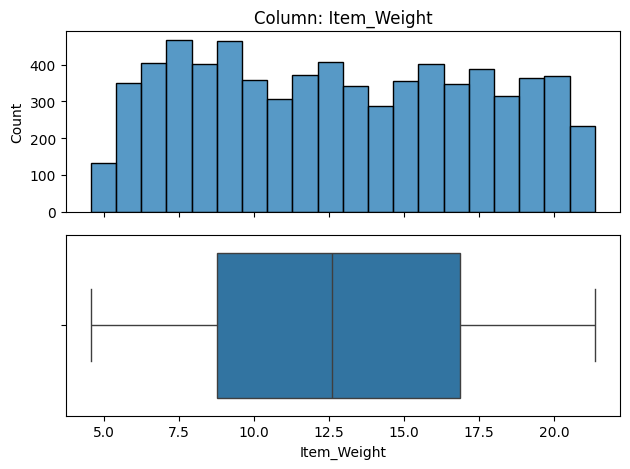

In [ ]:
feature_name = 'Item_Weight'
explore_numeric(df_sales, feature_name)

-   Expore Outlet_Size
    - Feature (categorical feature)


In [ ]:
outlet_size_classes = df_sales['Outlet_Size'].value_counts()
outlet_size_classes

,count
Outlet_Size,
Medium,2793
MISSING,2410
Small,2388
High,932


In [ ]:
def explore_cat(df, x, order=None):
  fig, ax = plt.subplots()
  sns.countplot(data= df, x = x, order=order)
  ax.set_title(f"Column: {x}")
  fig.tight_layout()
  return fig, ax

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

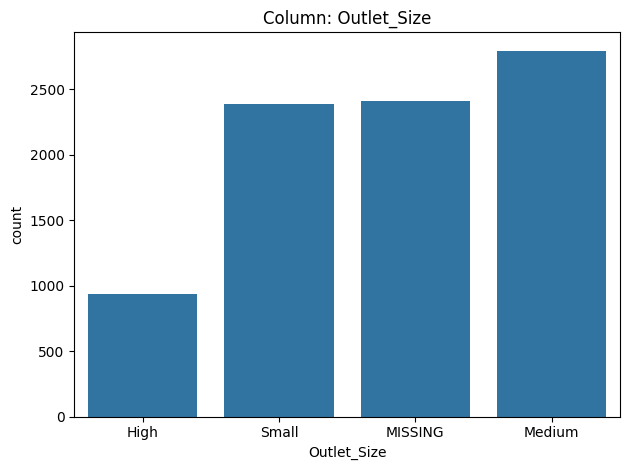

In [ ]:
feature_name = 'Outlet_Size'
order = outlet_size_classes.index[::-1]
explore_cat(df_sales, feature_name, order=order)


- Explore the relationship between numeric features
    - Heatmap

In [ ]:
numeric_cols = df_sales.select_dtypes('number')
corr = numeric_cols.corr().round(2)
corr

,Item_Weight,Item_Visibility,Item_Max_Retail_Price,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_Max_Retail_Price,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


<Axes: >

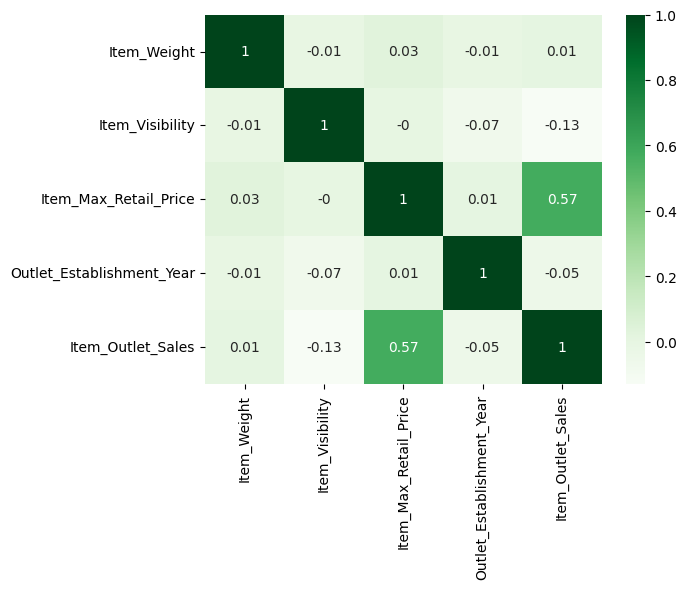

In [ ]:
sns.heatmap(corr, annot=True, cmap='Greens')

We can see from the heatmap that the relationship between Item_Max_Retail_Price and Item_Outlet_Sales is **positive moderate relationship 0.57** (between 0.5 and 0.7 )

<Axes: xlabel='Item_Max_Retail_Price', ylabel='Item_Outlet_Sales'>

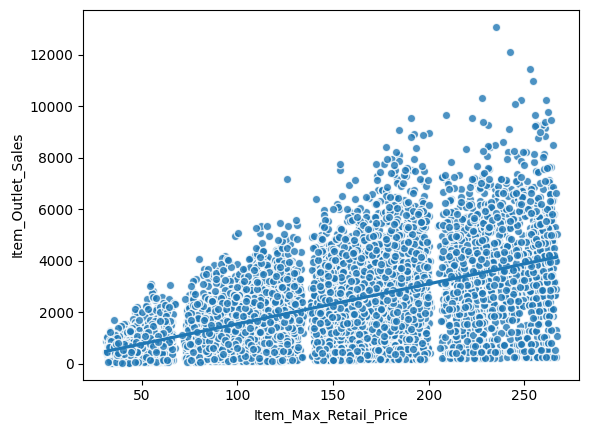

In [ ]:
sns.regplot(data=df_sales, x= 'Item_Max_Retail_Price', y= 'Item_Outlet_Sales', scatter_kws={'edgecolor':'white'})

## Feature Inspection

- Remove the placeholders we added before and replace them with null values, so we can make informed choices about data preparation for machine learning


In [ ]:
df_sales['Item_Weight'] = df_sales['Item_Weight'].replace(-1, np.nan)
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].replace('MISSING', np.nan)

In [ ]:
destination_path = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week04/Data/Sales_Prediction.csv"
df_sales.to_csv(destination_path, index=False)

- Insert EDA custom functions for features visualization

In [ ]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


  """MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y,figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white',
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y,
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

- We are going to inspect each feature that might play crucial role in increasing sales

### Item_Weight

- Weight of product

In [ ]:
# Confirming the dtype to select correct EDA function
df_sales['Item_Weight'].dtype

dtype('float64')

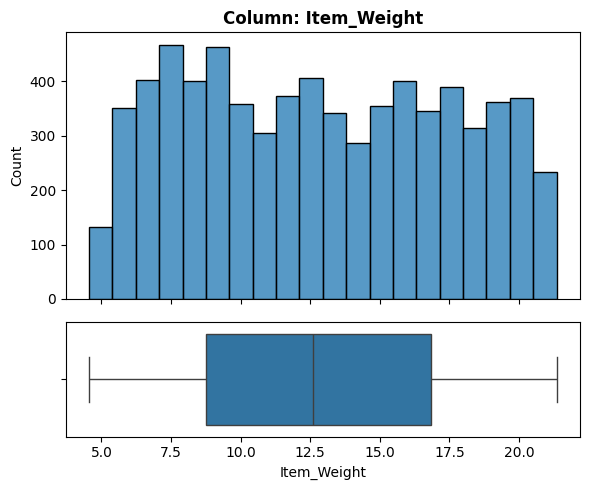

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df_sales, 'Item_Weight')
warnings.filterwarnings('ignore')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 null values (17.17%)
  - Impute with the median

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable(numeric)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


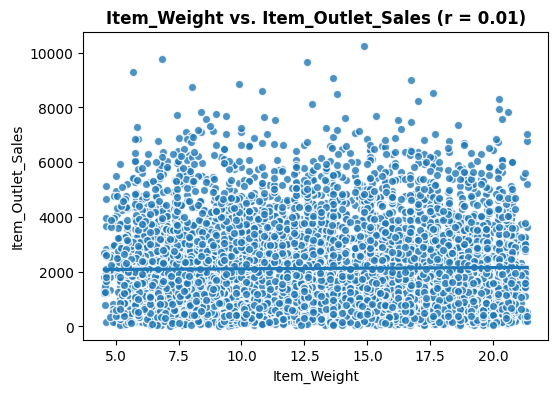

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, x = 'Item_Weight', y = 'Item_Outlet_Sales')
warnings.filterwarnings('ignore')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No, I think knowing the weight of an item would not give any information about its sales.
  - Does this feature appear to be a predictor of the target?
    - No it doesn't, the correlation coefficent is 0.01 which is extremly close from 0. The trendline is flat. Also, the data points spread randomly in a rectangle form.

___

### Item_Fat_Content

- Whether the product is low fat or regular

In [ ]:
# Confirming the dtype to select correct EDA function
df_sales['Item_Fat_Content'].dtype

dtype('O')

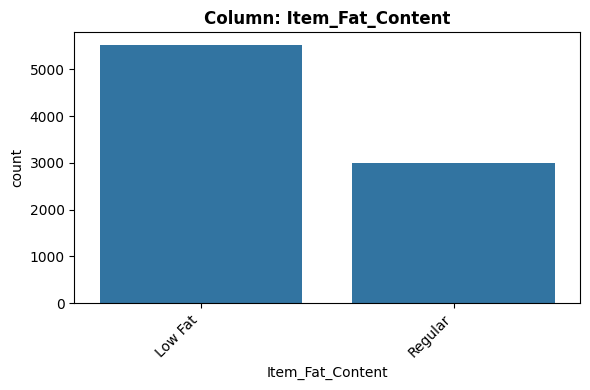

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df_sales, 'Item_Fat_Content')
warnings.filterwarnings('ignore')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Nominal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - Zero null values
  - No Imputation

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 2
  - No, it's not. Less than 10

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


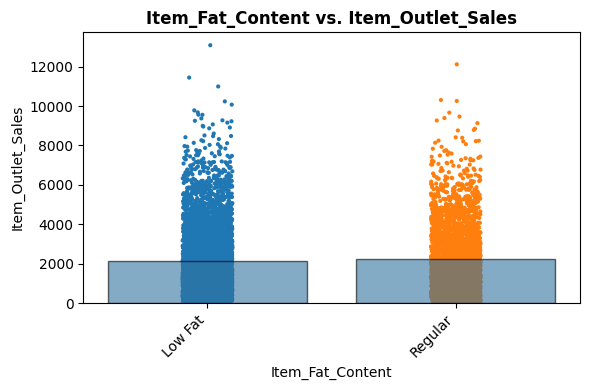

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, x = 'Item_Fat_Content', y = 'Item_Outlet_Sales')
warnings.filterwarnings('ignore')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - No it doesn't appear to be a predictor. The avg sales for both regular and low fat items are nearly identical(2000). The distribution of the data points is extremely the same.

___

### Item_Visibility

- The percentage of total dispay area of all products in a store allocated to the particular product

In [ ]:
# Confirming the dtype to select correct EDA function
df_sales['Item_Visibility'].dtype

dtype('float64')

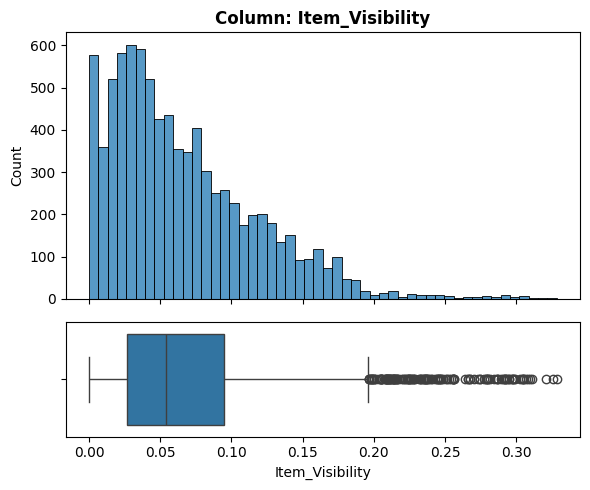

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df_sales, 'Item_Visibility')
warnings.filterwarnings('ignore')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - Zero null values
  - No Imputation

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not Applicalble (Numeric)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


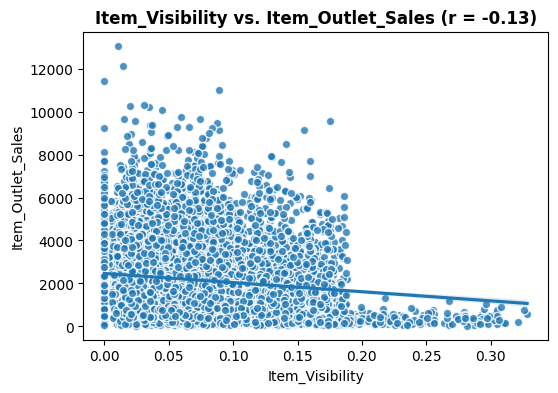

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, x = 'Item_Visibility', y = 'Item_Outlet_Sales')
warnings.filterwarnings('ignore')

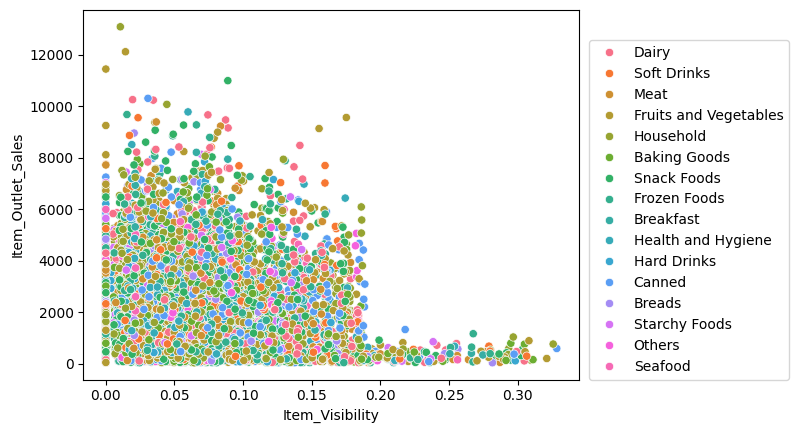

In [ ]:
fig, ax = plt.subplots();
sns.scatterplot(df_sales, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue="Item_Type", ax= ax)
ax.legend(loc=(1.02, 0))
warnings.filterwarnings('ignore')

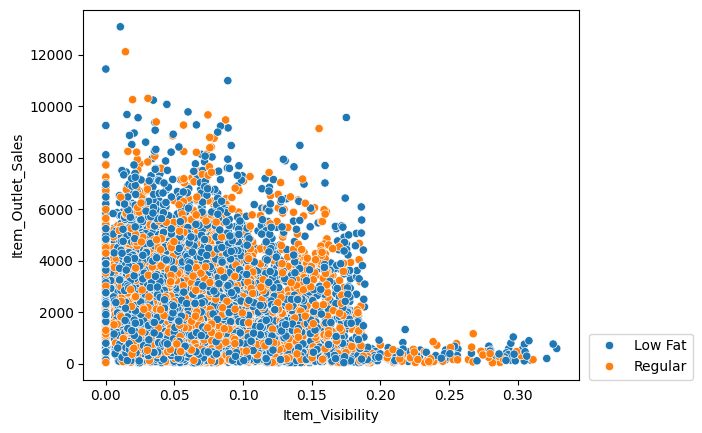

In [ ]:
fig, ax = plt.subplots();
sns.scatterplot(df_sales, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue="Item_Fat_Content", ax= ax)
ax.legend(loc=(1.02, 0))
warnings.filterwarnings('ignore')

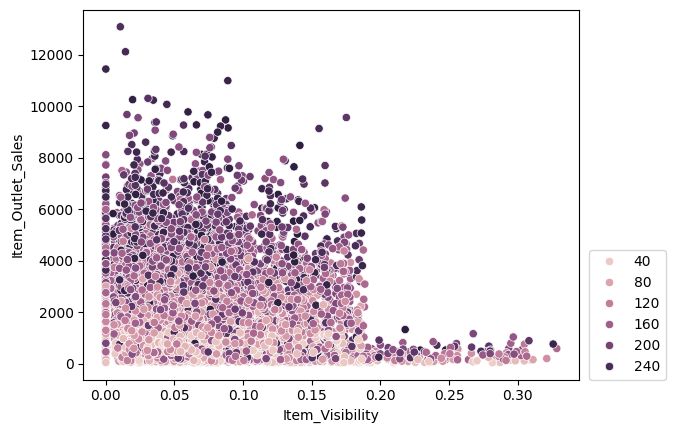

In [ ]:
fig, ax = plt.subplots();
sns.scatterplot(df_sales, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue="Item_Max_Retail_Price", ax= ax)
ax.legend(loc=(1.02, 0))
warnings.filterwarnings('ignore')

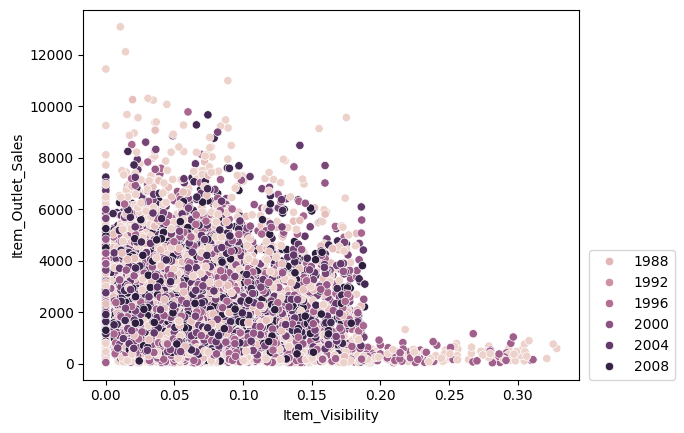

In [ ]:
fig, ax = plt.subplots();
sns.scatterplot(df_sales, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue="Outlet_Establishment_Year", ax= ax)
ax.legend(loc=(1.02, 0))
warnings.filterwarnings('ignore')

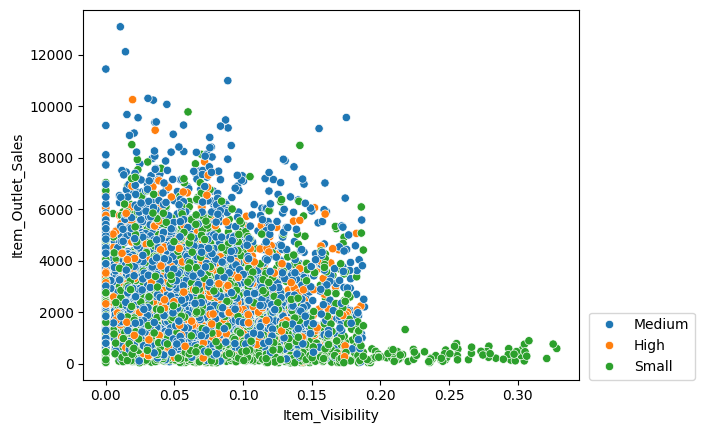

In [ ]:
fig, ax = plt.subplots();
sns.scatterplot(df_sales, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue="Outlet_Size", ax= ax)
ax.legend(loc=(1.02, 0))
warnings.filterwarnings('ignore')

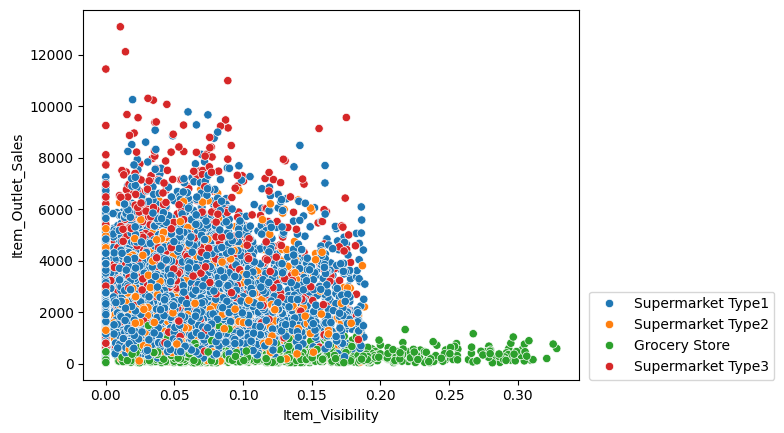

In [ ]:
fig, ax = plt.subplots();
sns.scatterplot(df_sales, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue="Outlet_Type", ax= ax)
ax.legend(loc=(1.02, 0))
warnings.filterwarnings('ignore')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Possibly. The correlation coefficient indicates low negative relationship(-0.13). As the item visibility increases, the item outlet sales tend to decrease slightly.

___

### Item_Type

- The category to which the product belongs

In [ ]:
# Confirming the dtype to select correct EDA function
df_sales['Item_Type'].dtype

dtype('O')

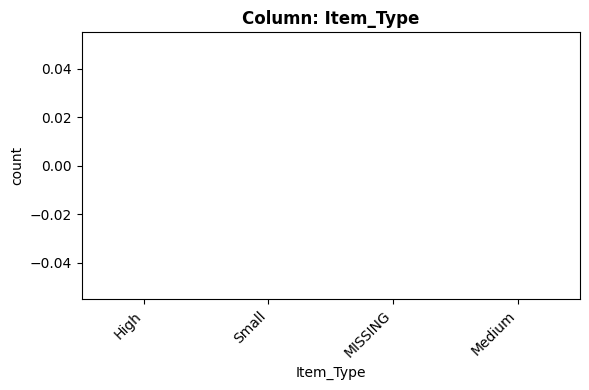

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [ ]:

explore_categorical(df_sales, 'Item_Type', order=order)
warnings.filterwarnings('ignore')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Nominal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - Zero null values
  - No Imputation

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16
  - Yes. More than 10

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


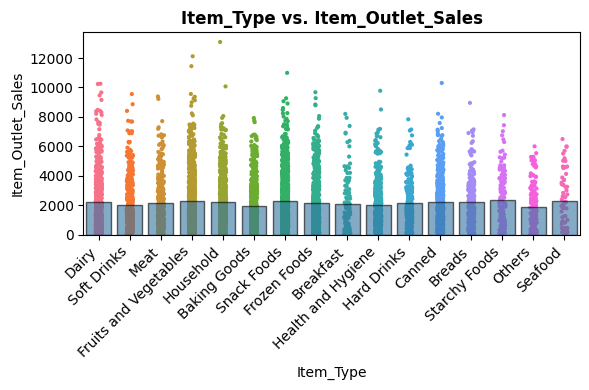

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, x = 'Item_Type', y = 'Item_Outlet_Sales')
warnings.filterwarnings('ignore')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Possily, it may be an indicator when combined with other features. The distribution of sales accross most items is similar (0 to 10000+).

___

### Item_MRP

- Maximum retail price(list price) of the product

In [ ]:
# Confirming the dtype to select correct EDA function
df_sales['Item_Max_Retail_Price'].dtype

dtype('float64')

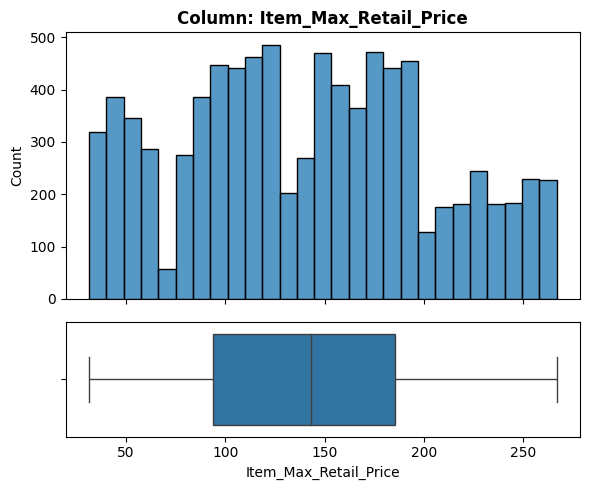

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df_sales, 'Item_Max_Retail_Price')
warnings.filterwarnings('ignore')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - Zero null values
  - No Imputation

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not Applicalble (Numeric)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


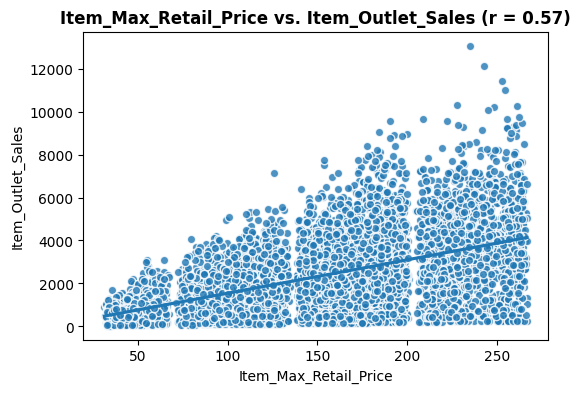

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, x = 'Item_Max_Retail_Price', y = 'Item_Outlet_Sales')
warnings.filterwarnings('ignore')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes. The correlation coefficient indicates moderate positive relationship(0.57). As the item max retail price increases, the item outlet sales tend to increase.

___

### Outlet_Establishment_Year





- The year in which the outlet was established

In [ ]:
# Confirming the dtype to select correct EDA function
df_sales['Outlet_Establishment_Year'].dtype

dtype('int64')

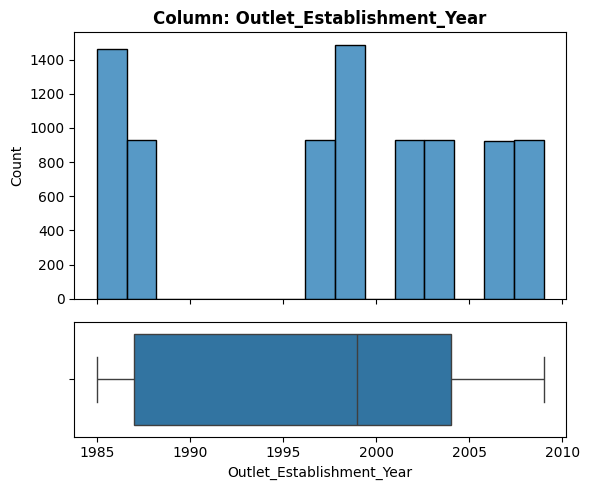

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df_sales, 'Outlet_Establishment_Year')
warnings.filterwarnings('ignore')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - Zero null values
  - No Imputation

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not Applicalble (Numeric)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


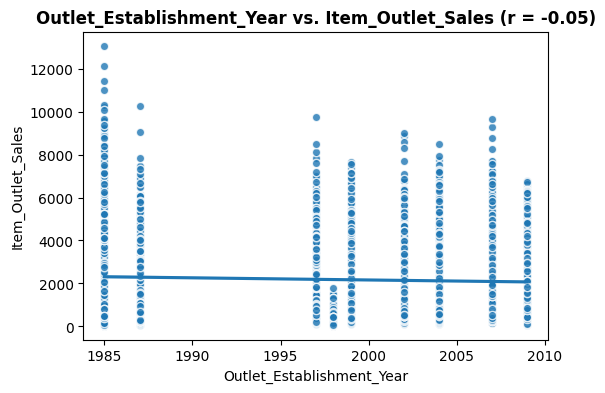

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales')
warnings.filterwarnings('ignore')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No.
  - Does this feature appear to be a predictor of the target?
    - No it doesn't, the correlation coefficent is -0.05 which is extremly close from 0. The trendline is flat.

___

### Outlet_Size

- The size of the store in terms of ground area covered

In [ ]:
# Confirming the dtype to select correct EDA function
df_sales['Outlet_Size'].dtype

dtype('O')

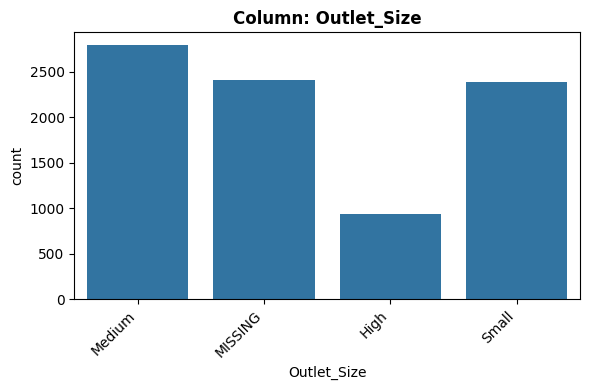

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df_sales, 'Outlet_Size')
warnings.filterwarnings('ignore')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Nominal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values (28.28%)
  - Impute with placehoder 'MISSING'

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 less than 10

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


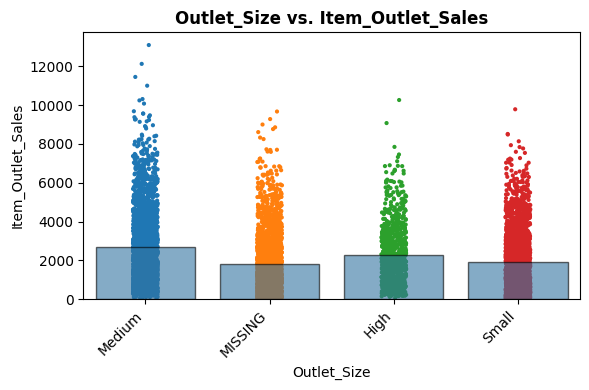

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, x = 'Outlet_Size', y = 'Item_Outlet_Sales')
warnings.filterwarnings('ignore')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Possibly. The mean sales(2400) of Medium outlet size is higher than other categories(Missing, High, Small). While those have quite similar distribution of sales.

___

### Outlet_Location_Type

- The type of area in which the store is located

In [ ]:
# Confirming the dtype to select correct EDA function
df_sales['Outlet_Location_Type'].dtype

dtype('O')

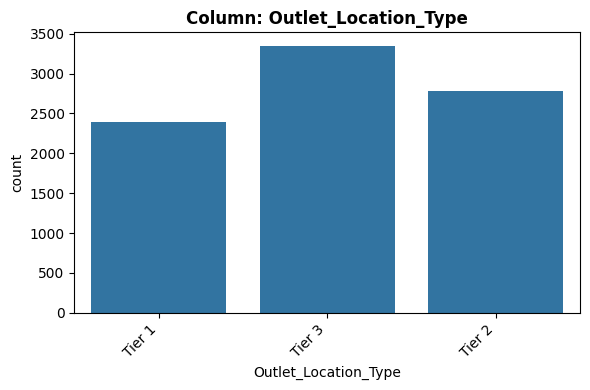

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df_sales, 'Outlet_Location_Type')
warnings.filterwarnings('ignore')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Nominal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - Zero null values
  - No Imputation

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 less than 10

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


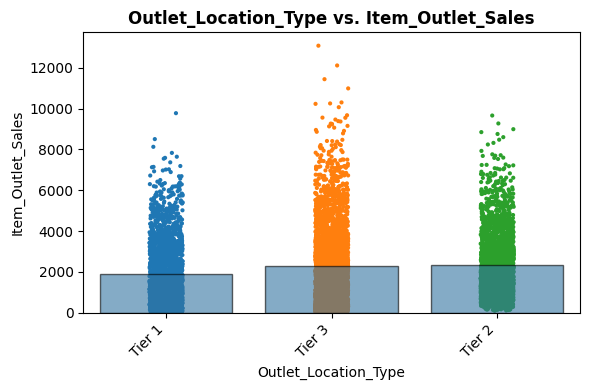

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales')
warnings.filterwarnings('ignore')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Possibly. The distribution of sales accross different location types overlap heavily. Tier 3 show higher upper outliers.

___

### Outlet_Type

- Whether the outlet is a grocery store or some sort of supermarket

In [ ]:
# Confirming the dtype to select correct EDA function
df_sales['Outlet_Type'].dtype

dtype('O')

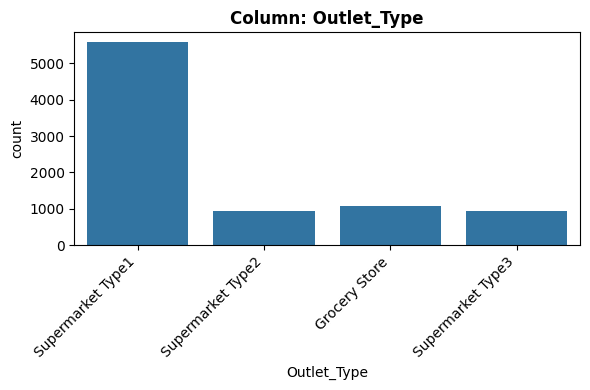

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df_sales, 'Outlet_Type')
warnings.filterwarnings('ignore')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Nominal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - Zero null values
  - No Imputation

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 less than 10.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


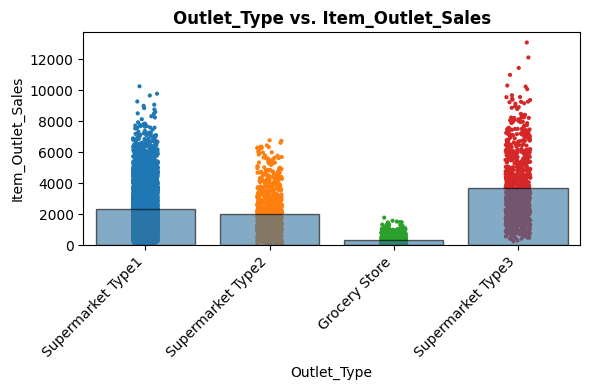

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, x = 'Outlet_Type', y = 'Item_Outlet_Sales')
warnings.filterwarnings('ignore')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes. Type 3 obviously shows the highest sales among other types(4000). Type1 and 2 have quite similar sales. Grocery store shows  very low sales compared to others.

___

### Item_Outlet_Sales (the target)




- Sales of the product in the particular store.

In [ ]:
# Confirming the dtype to select correct EDA function
df_sales['Item_Outlet_Sales'].dtype

dtype('float64')

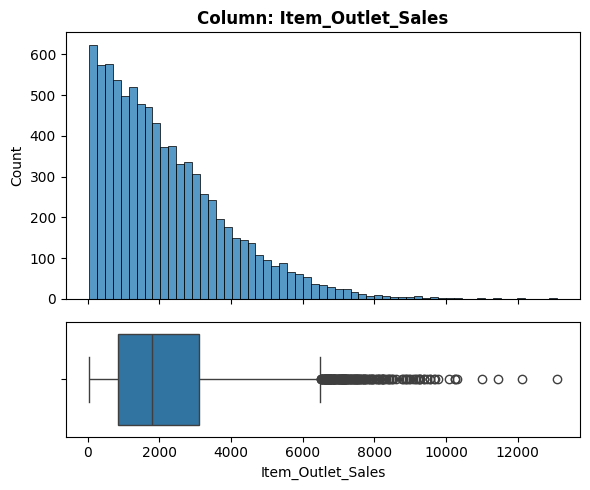

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df_sales, 'Item_Outlet_Sales')
warnings.filterwarnings('ignore')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - Zero null values
  - No Imputation

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not Applicalble (Numeric)

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, its our target!


## Data Preparation for Modeling

I'm going to load the data again to avoid data leakage

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

### Load and Inspect Data

In [ ]:
#load and read the data
file_path = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Data Cleaning

In [ ]:
#Change not clear features' names
df = df.rename(columns={'Item_MRP': 'Item_Max_Retail_Price'})

In [ ]:
#Drop Item_Identifier and Outlet_Identier -> High Cardinality
df = df.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

In [ ]:
#Check for inconsistancies in object features
obj_cols = df.select_dtypes('object').columns
for i in obj_cols:
  print(df[i].value_counts(dropna=False))
  print('\n')

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Size
Medium    2793
NaN       2410
Small     2388
High       932
Name: count, dtype: int64


Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64


Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64




In [ ]:
#fix inconsistanies in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [ ]:
#chect descriptive statistics in numeric features
num_cols = df.select_dtypes('number').columns
df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_Max_Retail_Price,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#check null values
df.isna().sum()

,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_Max_Retail_Price,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0
Item_Outlet_Sales,0


### Preparing for Modeling

In [ ]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_Max_Retail_Price,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


**Types of Features **
- **Item_Weight(numeric):** impute with median / scale
- **Item_Fat_Content(nominal):** one hot encoding
- **Item_Visibility(numeric):** scale
- **Item_Type(nominal):** one hot encoding
- **Item_MRP(numeric):** scale
- **Outlet_Etablishment_Year(numeric):** scale
- **Outlet_Size(nominal):** impute with missing / one hot encoding
- **Outlet_Location_Type(nominal):** one hot encoding
- **Outlet_Type(nominal):** one hot encoding
- **Item_Outlet_Sales(numeric):** our target we don't transform

In [ ]:
#import train test split
from sklearn.model_selection import train_test_split
#import transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
#import set_config
from sklearn import set_config
set_config(transform_output='pandas')#to set the default output of sklearn transformers to pandas dataframes
pd.set_option('display.max_columns',50)

In [ ]:
#define list of the matrix features and the target vector
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

#declare the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:

#instantiate the transformers
num_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#instantiate the pipeline for numeric
num_pipeline = make_pipeline(num_imputer, scaler)

#instantiate the pipeline for nominal
cat_pipeline = make_pipeline(cat_imputer, ohe_encoder)

#define two lists for numeric and nominal
numeric_cols = X_train.select_dtypes('number').columns
nominal_cols = X_train.select_dtypes('object').columns

#define tuples for coulmn transformer
num_tuple = ('numeric', num_pipeline, numeric_cols)
nominal_tuple = ('nominal', cat_pipeline, nominal_cols)

#instandiate column tranformer
col_tranformer = ColumnTransformer([num_tuple, nominal_tuple],verbose_feature_names_out=False)

#fit the transformer
col_tranformer.fit(X_train)

#transform the training and test sets
X_train_processed = col_tranformer.transform(X_train)
X_test_processed = col_tranformer.transform(X_test)

In [ ]:
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_Max_Retail_Price,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,0.732018,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_test_processed.head()

,Item_Weight,Item_Visibility,Item_Max_Retail_Price,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,0.341372,-0.776646,-0.998816,-1.293807,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,-1.169135,0.100317,-1.585194,-0.102145,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,0.388798,-0.482994,-1.595784,0.136187,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,-0.049889,-0.415440,0.506592,-1.532139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
856,-0.632039,-1.047426,0.886725,0.732018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
